## 1. Load the shared library

In [1]:
import ctypes
import sys
import numpy as np
from scipy.stats import norm,logistic
import matplotlib.pyplot as plt
%matplotlib inline

if sys.platform == 'darwin':
    libname = './distlib.dylib'
else:
    libname = './distlib.so'

lib = ctypes.cdll.LoadLibrary(libname)

In [2]:
# Declare return types
lib.dnorm.restype     = ctypes.c_double
lib.dlogis.restype    = ctypes.c_double
lib.pnorm.restype     = ctypes.c_double
lib.plogis.restype    = ctypes.c_double
lib.grad_norm.restype = ctypes.c_double
lib.grad_logis.restype = ctypes.c_double

AttributeError: dlsym(0x7fcc96b14f60, grad_logis): symbol not found

## 2. Visualize PDF

In [4]:
# Parameters of distribution
mu     = 0.0
sd     = 1.0
x_vals = np.linspace(-4, 4, 200)

In [5]:
# Call dnorm() function for every x in x_vals
y_vals_dnorm = [lib.dnorm(ctypes.c_double(x), ctypes.c_double(mu), ctypes.c_double(sd)) for x in x_vals]
# Call dlogis() function for every x in x_vals
y_vals_dlogis = [lib.dlogis(ctypes.c_double(x), ctypes.c_double(mu), ctypes.c_double(sd)) for x in x_vals]

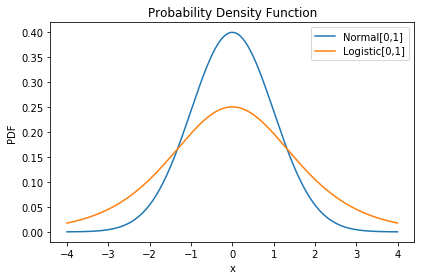

In [4]:
plt.plot(x_vals, y_vals_dnorm, label='Normal[0,1]')
plt.plot(x_vals, y_vals_dlogis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Probability Density Function')
plt.legend(loc='best')
plt.tight_layout()

In [9]:
x_vals = np.linspace(-4, 4, 200)
# Call pnorm() function for every x in x_vals
y_vals_pnorm = [lib.pnorm(ctypes.c_double(x), ctypes.c_double(mu), ctypes.c_double(sd)) for x in x_vals]
# Call plogis() function for every x in x_vals
y_vals_plogis = [lib.plogis(ctypes.c_double(x), ctypes.c_double(mu), ctypes.c_double(sd)) for x in x_vals]

## 3. Visualize CDF

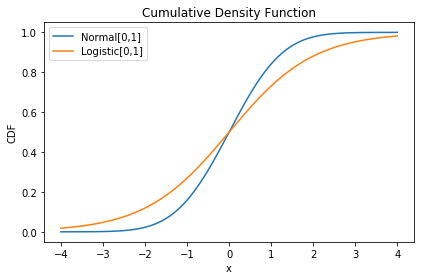

In [5]:
plt.plot(x_vals, y_vals_pnorm, label='Normal[0,1]')
plt.plot(x_vals, y_vals_plogis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Cumulative Density Function')
plt.legend(loc='best')
plt.tight_layout()

# 4. Verifying with SCIPY

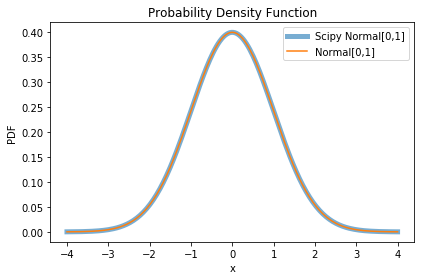

In [6]:
plt.plot(x_vals, norm.pdf(x_vals),lw=5, alpha=0.6, label='Scipy Normal[0,1]')
plt.plot(x_vals, y_vals_dnorm, label='Normal[0,1]')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Probability Density Function')
plt.legend(loc='best')
plt.tight_layout()

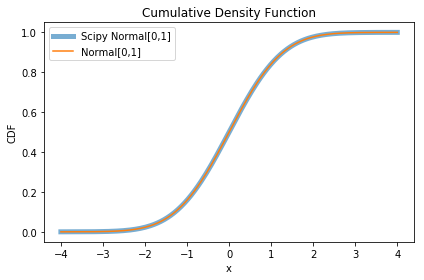

In [7]:
plt.plot(x_vals, norm.cdf(x_vals),lw=5, alpha=0.6, label='Scipy Normal[0,1]')
plt.plot(x_vals, y_vals_pnorm, label='Normal[0,1]')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Cumulative Density Function')
plt.legend(loc='best')
plt.tight_layout()

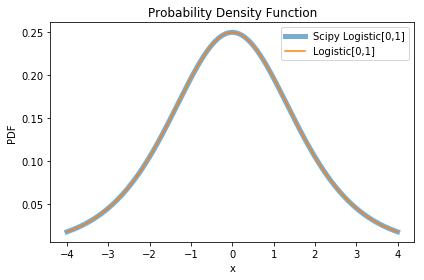

In [7]:
plt.plot(x_vals, logistic.pdf(x_vals),lw=5, alpha=0.6, label='Scipy Logistic[0,1]')
plt.plot(x_vals, y_vals_dlogis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Probability Density Function')
plt.legend(loc='best')
plt.tight_layout()

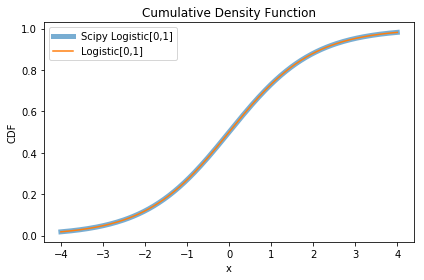

In [10]:
plt.plot(x_vals, logistic.cdf(x_vals),lw=5, alpha=0.6, label='Scipy Logistic[0,1]')
plt.plot(x_vals, y_vals_plogis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Cumulative Density Function')
plt.legend(loc='best')
plt.tight_layout()

# 5. Visualizing Gradient

In [11]:
# Call pnorm() function for every x in x_vals
y_vals_grad_norm = [lib.grad_norm(ctypes.c_double(x), ctypes.c_double(mu), ctypes.c_double(sd)) for x in x_vals]
# Call plogis() function for every x in x_vals
y_vals_grad_logis = [lib.grad_logis(ctypes.c_double(x), ctypes.c_double(mu), ctypes.c_double(sd)) for x in x_vals]

AttributeError: dlsym(0x7fa77ba97940, grad_logis): symbol not found